<a href="https://colab.research.google.com/github/Jaya30102003/Automatic-Number-Plate-Recognition-System/blob/main/ANPRusingYOLO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Dataset Download**


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="BGIamofX64KdKdp618N2")
project = rf.workspace("mochoye").project("license-plate-detector-ogxxg")
version = project.version(2)
dataset = version.download("yolov8")


loading Roboflow workspace...
loading Roboflow project...


In [ ]:
!pip install roboflow
!pip install ultralytics
!pip install opencv-python-headless

In [ ]:
from roboflow import Roboflow
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt

**Loading and Training YOLOv8 using custom datasets**

In [ ]:
# Load YOLOv8 model (pre-trained or custom)
model = YOLO('yolov8n.pt')  # You can replace 'yolov8n.pt' with another pre-trained model if needed (e.g., yolov8s.pt, yolov8m.pt)

In [ ]:
# Print the layers of the YOLOv8 model
print(model)

YOLO(
  (model): DetectionModel(
    (model): Sequential(
      (0): Conv(
        (conv): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(16, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (1): Conv(
        (conv): Conv2d(16, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
        (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
        (act): SiLU(inplace=True)
      )
      (2): C2f(
        (cv1): Conv(
          (conv): Conv2d(32, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_stats=True)
          (act): SiLU(inplace=True)
        )
        (cv2): Conv(
          (conv): Conv2d(48, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (bn): BatchNorm2d(32, eps=0.001, momentum=0.03, affine=True, track_running_s

In [ ]:
# Train the model using the dataset
model.train(data=dataset.location + '/data.yaml', epochs=10, imgsz=640)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/content/License-Plate-Detector-2/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=0, project=None, name=train44, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True,

train: Scanning /content/License-Plate-Detector-2/train/labels.cache... 277 images, 0 backgrounds, 0 corrupt: 100%|██████████| 277/277 [00:00<?, ?it/s]

albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))



val: Scanning /content/License-Plate-Detector-2/valid/labels.cache... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]

Plotting labels to runs/detect/train44/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train44
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G     0.7315     0.9454     0.9463          5        640: 100%|██████████| 18/18 [02:29<00:00,  8.32s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.05s/it]

                   all         81         81      0.987      0.974      0.988      0.826



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G     0.7169     0.8893     0.9445          5        640: 100%|██████████| 18/18 [02:26<00:00,  8.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.91s/it]

                   all         81         81      0.984      0.988      0.985      0.793



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.7147     0.8234     0.9357          5        640: 100%|██████████| 18/18 [02:25<00:00,  8.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.39s/it]

                   all         81         81      0.984      0.988      0.986       0.82



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.6951     0.8137     0.9152          5        640: 100%|██████████| 18/18 [02:26<00:00,  8.15s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.92s/it]

                   all         81         81          1      0.947      0.985      0.797



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.6967     0.7681     0.9518          5        640: 100%|██████████| 18/18 [02:26<00:00,  8.11s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.03s/it]

                   all         81         81      0.984      0.975      0.985      0.816



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.7034     0.7514     0.9219          5        640: 100%|██████████| 18/18 [02:27<00:00,  8.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.15s/it]

                   all         81         81      0.988      0.986      0.985      0.811



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.7213     0.7296      0.933          5        640: 100%|██████████| 18/18 [02:34<00:00,  8.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:16<00:00,  5.36s/it]

                   all         81         81      0.985      0.988      0.988      0.815



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.7089     0.7094     0.9146          5        640: 100%|██████████| 18/18 [02:34<00:00,  8.60s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.29s/it]

                   all         81         81      0.985      0.975      0.991      0.839



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G     0.7001     0.6868     0.9188          5        640: 100%|██████████| 18/18 [02:29<00:00,  8.29s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:15<00:00,  5.05s/it]

                   all         81         81      0.994      0.975      0.991      0.846



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.6846      0.654       0.94          5        640: 100%|██████████| 18/18 [02:25<00:00,  8.10s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:14<00:00,  4.99s/it]

                   all         81         81      0.987      0.988      0.992      0.842



10 epochs completed in 0.459 hours.
Optimizer stripped from runs/detect/train44/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train44/weights/best.pt, 6.2MB

Validating runs/detect/train44/weights/best.pt...
Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:13<00:00,  4.66s/it]


                   all         81         81      0.995      0.975      0.991      0.846
Speed: 1.8ms preprocess, 161.1ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train44


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a02e23f3610>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [ ]:
# Evaluate the trained model
results = model.val()

# Display results
print(results)

Ultralytics 8.3.78 🚀 Python-3.11.11 torch-2.5.1+cu124 CPU (AMD EPYC 7B12)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


val: Scanning /content/License-Plate-Detector-2/valid/labels.cache... 81 images, 0 backgrounds, 0 corrupt: 100%|██████████| 81/81 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:13<00:00,  2.32s/it]


                   all         81         81      0.995      0.975      0.991      0.846
Speed: 1.4ms preprocess, 162.7ms inference, 0.0ms loss, 0.5ms postprocess per image
Results saved to runs/detect/train442
ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7a02d31cdd90>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0

**Rendering the model results**


image 1/1 /content/image2.jpg: 384x640 1 LicensePlate, 108.9ms
Speed: 4.7ms preprocess, 108.9ms inference, 0.8ms postprocess per image at shape (1, 3, 384, 640)


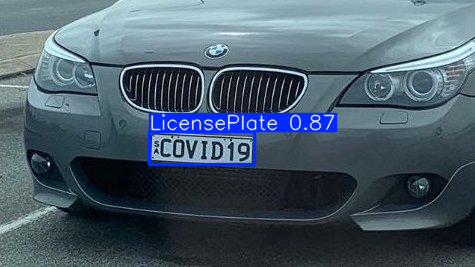

In [ ]:
# Run inference on a new image
img_path = '/content/image2.jpg'  # Replace with the path to your test image
results = model(img_path)

# Display results
results[0].show()  # Show the bounding boxes on the first image



image 1/1 /content/image2.jpg: 384x640 1 LicensePlate, 104.3ms
Speed: 4.3ms preprocess, 104.3ms inference, 0.7ms postprocess per image at shape (1, 3, 384, 640)
Bounding Box Coordinates: x_min=149, y_min=131, x_max=254, y_max=164


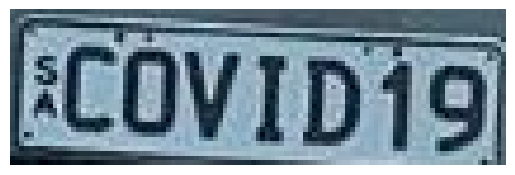

In [ ]:
# Run inference on your image
results = model(img_path)  # 'img_path' should be your image file path

# Extract bounding box coordinates for each detected object
for result in results:
    for box in result.boxes:  # Loop through each detected box
        # Get bounding box coordinates in xyxy format (x_min, y_min, x_max, y_max)
        x_min, y_min, x_max, y_max = map(int, box.xyxy[0].tolist())

        # Print the bounding box coordinates for debugging
        print(f"Bounding Box Coordinates: x_min={x_min}, y_min={y_min}, x_max={x_max}, y_max={y_max}")


img = cv2.imread(img_path)
license_plate_img = img[y_min:y_max, x_min:x_max]
license_plate_img = cv2.cvtColor(license_plate_img, cv2.COLOR_BGR2RGB)
plt.imshow(license_plate_img)
plt.axis('off')
plt.show()


**Number recognition using OCR**

In [ ]:
import pytesseract
# Use pytesseract to extract text (digits)
license_plate_text = pytesseract.image_to_string(license_plate_img, config='--psm 8')
print("Detected license plate text:", license_plate_text)


Detected license plate text: RCOVIDi9)

